In [1]:
from download_dataset import download, extract

download()
extract('~/paulbahush/data/notMNIST_small.tar.gz')

root_path = '~/paulbahush/data/notMNIST_small'
dataset_url = 'https://commondatastorage.googleapis.com/books1000/notMNIST_large.tar.gz'


image_size = 28
pixel_depth = 255.0

train_percentage = 0.8
test_percentage = 0.2

../data/notMNIST_large.tar.gz
File already exists.
Extracted.


In [2]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

classes_statistic = {}

for class_dir in os.listdir(root_path):
    class_path = os.path.join(root_path, class_dir)
    classes_statistic[class_dir] = len([name for name in os.listdir(class_path)])
    
total_count = sum(classes_statistic.values())
train_size = int(total_count * train_percentage)
test_size = int(total_count * test_percentage)

X = []
y = []

dirs = os.listdir(root_path)

label_dict = {}

counter = 0

for id_class, dir_class in enumerate(dirs):
    label_dict[id_class] = dir_class
    for image in tqdm(os.listdir(os.path.join(root_path, dir_class))):
        try:
            X.append(plt.imread(os.path.join(root_path, dir_class, image)).reshape(-1, image_size * image_size)[0])
            y.append(id_class)
            counter += 1
        except:
            continue

mu = np.mean(X)
std = np.std(X)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

100%|██████████| 1873/1873 [00:00<00:00, 18010.18it/s]


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running")
else:
    device = torch.device("cpu")
    print("Running")


input_size = 784
output_size = 10
hidden_sizes = [1200, 1200, 1200, 400, 100]

epochs = 400
batch_size = 512
learning_rate = 1e-3

Running on the GPU


### Задание 1.
#### Реализуйте полносвязную нейронную сеть с помощью библиотеки Tensor Flow. В качестве алгоритма оптимизации можно использовать, например, стохастический градиент (Stochastic Gradient Descent, SGD). Определите количество скрытых слоев от 1 до 5, количество нейронов в каждом из слоев до нескольких сотен, а также их функции активации (кусочно-линейная, сигмоидная, гиперболический тангенс и т.д.).

In [13]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_sizes[0])
        self.relu1 = nn.LeakyReLU()
        self.l2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.relu2 = nn.LeakyReLU()
        self.l3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.relu3 = nn.LeakyReLU()
        self.l4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])
        self.relu4 = nn.LeakyReLU()
        self.l5 = nn.Linear(hidden_sizes[3], hidden_sizes[4])
        self.relu5 = nn.LeakyReLU()
        self.l6 = nn.Linear(hidden_sizes[4], output_size)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu1(x)
        x = self.l2(x)
        x = self.relu2(x)
        x = self.l3(x)
        x = self.relu3(x)
        x = self.l4(x)
        x = self.relu4(x)
        x = self.l5(x)
        x = self.relu5(x)
        x = self.l6(x)
        return F.log_softmax(x)

net = Network()
net.to(device)

Network(
  (l1): Linear(in_features=784, out_features=1200, bias=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (l2): Linear(in_features=1200, out_features=1200, bias=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (l3): Linear(in_features=1200, out_features=1200, bias=True)
  (relu3): LeakyReLU(negative_slope=0.01)
  (l4): Linear(in_features=1200, out_features=400, bias=True)
  (relu4): LeakyReLU(negative_slope=0.01)
  (l5): Linear(in_features=400, out_features=100, bias=True)
  (relu5): LeakyReLU(negative_slope=0.01)
  (l6): Linear(in_features=100, out_features=10, bias=True)
)

In [14]:
optimizer = optim.Adagrad(net.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

In [15]:
x = torch.FloatTensor(X_train)
y = torch.LongTensor(y_train)

In [16]:
for e in range(epochs):
        
    for i in range(0, x.shape[0]-batch_size, batch_size):

        x_mini = x[i:i + batch_size] 
        y_mini = y[i:i + batch_size] 

        x_var, y_var = x_mini.to(device), y_mini.to(device)
        
        optimizer.zero_grad()
        net_out = net(x_var)
        
        loss = loss_function(net_out, y_var)
        loss.backward()
        optimizer.step()

    if e % 10 == 0:    
        print('Epoch: {} - Loss: {:.6f}'.format(e, loss.data))

/home/a_stasiuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 0 - Loss: 0.787878
Epoch: 10 - Loss: 0.293669
Epoch: 20 - Loss: 0.227287
Epoch: 30 - Loss: 0.175650
Epoch: 40 - Loss: 0.130496
Epoch: 50 - Loss: 0.094426
Epoch: 60 - Loss: 0.075361
Epoch: 70 - Loss: 0.054088
Epoch: 80 - Loss: 0.040751
Epoch: 90 - Loss: 0.030041
Epoch: 100 - Loss: 0.021447
Epoch: 110 - Loss: 0.015683
Epoch: 120 - Loss: 0.012036
Epoch: 130 - Loss: 0.009328
Epoch: 140 - Loss: 0.007352
Epoch: 150 - Loss: 0.005923
Epoch: 160 - Loss: 0.004872
Epoch: 170 - Loss: 0.004086
Epoch: 180 - Loss: 0.003472
Epoch: 190 - Loss: 0.002999
Epoch: 200 - Loss: 0.002632
Epoch: 210 - Loss: 0.002344
Epoch: 220 - Loss: 0.002106
Epoch: 230 - Loss: 0.001921
Epoch: 240 - Loss: 0.001763
Epoch: 250 - Loss: 0.001619
Epoch: 260 - Loss: 0.001500
Epoch: 270 - Loss: 0.001392
Epoch: 280 - Loss: 0.001299
Epoch: 290 - Loss: 0.001213
Epoch: 300 - Loss: 0.001138
Epoch: 310 - Loss: 0.001070
Epoch: 320 - Loss: 0.001007
Epoch: 330 - Loss: 0.000954
Epoch: 340 - Loss: 0.000900
Epoch: 350 - Loss: 0.000858
Epo

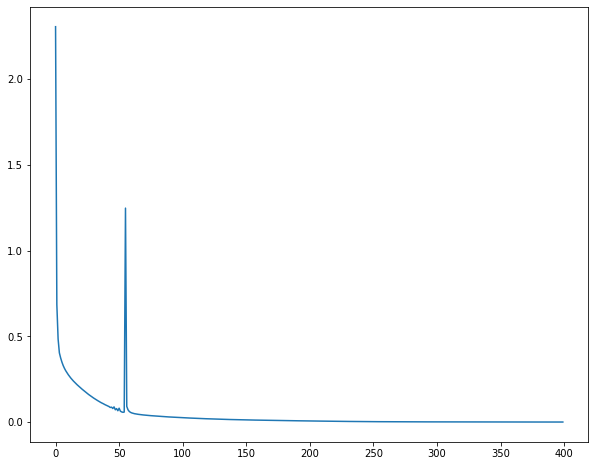

In [22]:
plt.figure(figsize=(10,8))


In [23]:
net.eval()

Network(
  (l1): Linear(in_features=784, out_features=1200, bias=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (l2): Linear(in_features=1200, out_features=1200, bias=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (l3): Linear(in_features=1200, out_features=1200, bias=True)
  (relu3): LeakyReLU(negative_slope=0.01)
  (l4): Linear(in_features=1200, out_features=400, bias=True)
  (relu4): LeakyReLU(negative_slope=0.01)
  (l5): Linear(in_features=400, out_features=100, bias=True)
  (relu5): LeakyReLU(negative_slope=0.01)
  (l6): Linear(in_features=100, out_features=10, bias=True)
)

In [24]:
test = torch.FloatTensor(X_test)
test_var = test.to(device)


In [25]:
net_out = net(test_var)

max_value, max_index = torch.max(net_out, 1)

y_pred = max_index.tolist()

/home/a_stasiuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [26]:
from sklearn.metrics import accuracy_score
test_score = accuracy_score(y_pred, y_test)
test_score

0.9156208277703605

### Задание 3.
#### Используйте регуляризацию и метод сброса нейронов (dropout) для борьбы с переобучением. Как улучшилось качество классификации?

In [35]:
epochs = 60
X_train_norm = X_train

In [37]:
x = torch.FloatTensor(X_train_norm)
y = torch.LongTensor(y_train)

In [38]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_sizes[0])
        self.bn1 = nn.BatchNorm1d(num_features=hidden_sizes[0])
        self.relu1 = nn.LeakyReLU()
        self.drop1 = nn.Dropout(0.25)
        self.l2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.relu2 = nn.LeakyReLU()
        self.drop2 = nn.Dropout(0.5)
        self.l3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.relu3 = nn.LeakyReLU()
        self.drop3 = nn.Dropout(0.25)
        self.l4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])
        self.relu4 = nn.LeakyReLU()
        self.drop4 = nn.Dropout(0.5)
        self.l5 = nn.Linear(hidden_sizes[3], hidden_sizes[4])
        self.relu5 = nn.LeakyReLU()
        self.l6 = nn.Linear(hidden_sizes[4], output_size)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.l1(x)))
        x = self.relu1(x)
        x = self.drop1(x)
        x = self.l2(x)
        x = self.relu2(x)
        x = self.drop2(x)
        x = self.l3(x)
        x = self.relu3(x)
        x = self.drop3(x)
        x = self.l4(x)
        x = self.relu4(x)
        x = self.drop4(x)
        x = self.l5(x)
        x = self.relu5(x)
        x = self.l6(x)
        return F.log_softmax(x)

net = Network()
net.to(device)

Network(
  (l1): Linear(in_features=784, out_features=1200, bias=True)
  (bn1): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (drop1): Dropout(p=0.25, inplace=False)
  (l2): Linear(in_features=1200, out_features=1200, bias=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (drop2): Dropout(p=0.5, inplace=False)
  (l3): Linear(in_features=1200, out_features=1200, bias=True)
  (relu3): LeakyReLU(negative_slope=0.01)
  (drop3): Dropout(p=0.25, inplace=False)
  (l4): Linear(in_features=1200, out_features=400, bias=True)
  (relu4): LeakyReLU(negative_slope=0.01)
  (drop4): Dropout(p=0.5, inplace=False)
  (l5): Linear(in_features=400, out_features=100, bias=True)
  (relu5): LeakyReLU(negative_slope=0.01)
  (l6): Linear(in_features=100, out_features=10, bias=True)
)

In [39]:
optimizer = optim.Adagrad(net.parameters(), lr=learning_rate)
optimizer2 = optim.Adagrad(net.parameters(), lr=1e-4)
optimizer3 = optim.Adagrad(net.parameters(), lr=1e-5)
loss_func = nn.CrossEntropyLoss()

### Задание 4.
#### Воспользуйтесь динамически изменяемой скоростью обучения (learning rate). Наилучшая точность, достигнутая с помощью данной модели составляет 97.1%. Какую точность демонстрирует Ваша реализованная модель?

In [40]:
learning_rate = 0.1
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

In [41]:
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR

scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.1, patience=0, verbose=True)

In [42]:
from sklearn.metrics import accuracy_score

losses = []

for e in range(epochs): 
        
    for i in range(0, x.shape[0]-batch_size, batch_size):

        x_mini = x[i:i + batch_size] 
        y_mini = y[i:i + batch_size]
        
        x_var, y_var = x_mini.to(device), y_mini.to(device)
        
        optimizer.zero_grad()
        net_out = net(x_var)
        
        loss = loss_func(net_out, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 500 == 0:
            losses.append(loss.data)
            
            test = torch.FloatTensor(X_test)
            test = (test - mu)/std
            test_var = test.to(device)
            
            net_out = net(test_var)

            max_value, max_index = torch.max(net_out, 1)

            y_pred = max_index.tolist()
            
            
            accuracy = accuracy_score(y_pred, y_test)
            
    if e % 20 == 0:
        print('Epoch {} completed'.format(e))
        print('Loss: {}. Accuracy: {}'.format(loss.item(), accuracy))
        print('-'*20)
    scheduler.step(accuracy)

/home/a_stasiuk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch 0 completed
Loss: 1.5088578462600708. Accuracy: 0.10493991989319092
--------------------
Epoch     5: reducing learning rate of group 0 to 1.0000e-02.
Epoch     9: reducing learning rate of group 0 to 1.0000e-03.
Epoch    12: reducing learning rate of group 0 to 1.0000e-04.
Epoch    13: reducing learning rate of group 0 to 1.0000e-05.
Epoch    14: reducing learning rate of group 0 to 1.0000e-06.
Epoch    16: reducing learning rate of group 0 to 1.0000e-07.
Epoch    17: reducing learning rate of group 0 to 1.0000e-08.
Epoch 20 completed
Loss: 0.18299183249473572. Accuracy: 0.9078771695594126
--------------------
Epoch 40 completed
Loss: 0.16235029697418213. Accuracy: 0.9081441922563418
--------------------


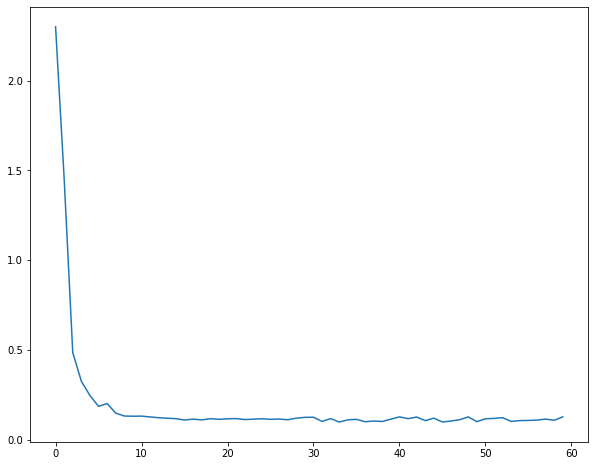

In [43]:
plt.figure(figsize=(10,8))
plt.plot(losses)

In [44]:
net.eval()

Network(
  (l1): Linear(in_features=784, out_features=1200, bias=True)
  (bn1): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (drop1): Dropout(p=0.25, inplace=False)
  (l2): Linear(in_features=1200, out_features=1200, bias=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (drop2): Dropout(p=0.5, inplace=False)
  (l3): Linear(in_features=1200, out_features=1200, bias=True)
  (relu3): LeakyReLU(negative_slope=0.01)
  (drop3): Dropout(p=0.25, inplace=False)
  (l4): Linear(in_features=1200, out_features=400, bias=True)
  (relu4): LeakyReLU(negative_slope=0.01)
  (drop4): Dropout(p=0.5, inplace=False)
  (l5): Linear(in_features=400, out_features=100, bias=True)
  (relu5): LeakyReLU(negative_slope=0.01)
  (l6): Linear(in_features=100, out_features=10, bias=True)
)

In [45]:
test = torch.FloatTensor(X_test)
test_var = test.to(device)
net_out = net(test_var)
max_value, max_index = torch.max(net_out, 1)
y_pred = max_index.tolist()

In [47]:
from sklearn.metrics import accuracy_score
test_score = accuracy_score(y_pred, y_test)
test_score

0.916154873164219